In [1]:
import numpy as np
from datasets import load_dataset, load_from_disk
from pixel_datasets.dataset_transformations import SyntheticDatasetTransform, SimpleTorchTransform  
from pixel_datasets.pixel_dataset_generator import PretrainingDataset
from pixel_datasets.glue_dataset_generator import GlueDatasetForPixel
from pixel_datasets.utils.utils import mask_single_word_from_scan, convert_torch_tensor_to_image
import wandb
from tqdm.auto import tqdm
from pixel.utils.inference import load_model_for_pretraining, predict, parse_outputs
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
visualization_dataset = load_dataset("multi_news", split="validation")
visualization_dataset = visualization_dataset.rename_column("document", "text")

In [3]:
rng = np.random.RandomState(42)
wandb.init(config="/home/knf792/PycharmProjects/pixel-2/configs/pretraining_config.yaml", mode="disabled")
transform = SyntheticDatasetTransform(wandb.config, rng=rng)
simple_transform = SimpleTorchTransform(wandb.config, rng=rng)

dataset = PretrainingDataset(config=wandb.config, text_dataset=visualization_dataset,
        transform=simple_transform,
        rng=rng,
        )

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


In [4]:
visualization_examples = []
counter = 10
for sample in tqdm(dataset):
    if counter == 0:
        break
    counter -= 1
    visualization_examples.append(sample)

0it [00:00, ?it/s]

In [7]:
model = load_model_for_pretraining(wandb.config, "/projects/copenlu/data/nadav/pixel/PretarinedPHD_v2/checkpoint-200000/")

In [ ]:
convert_torch_tensor_to_image

In [8]:
predictions = []
for example in tqdm(visualization_examples):
    outputs = predict(model, example["pixel_values"], example["patch_mask"])
    prediction = parse_outputs(outputs, model, example["pixel_values"])
    predictions.append(prediction)

  0%|          | 0/10 [00:00<?, ?it/s]

tensor(0.0004) tensor(0.7567)
tensor(0.0001) tensor(0.7180)
tensor(3.5445e-06) tensor(0.7222)
tensor(0.0315) tensor(0.7236)
tensor(2.0778e-05) tensor(0.7286)
tensor(0.0003) tensor(0.7283)
tensor(0.0003) tensor(0.7355)
tensor(5.7520e-05) tensor(0.7175)
tensor(0.0038) tensor(0.7075)
tensor(0.0001) tensor(0.7520)


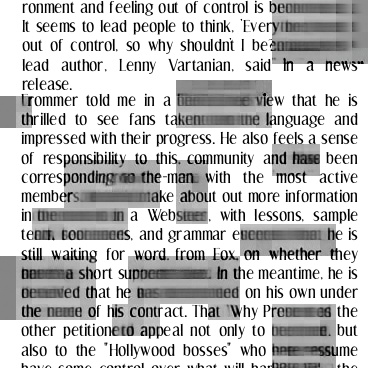

In [15]:
prediction = Image.fromarray((predictions[6]).astype(np.uint8))
prediction